In [1]:
import os;
import pickle; 
if os.path.isfile('/Users/eyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves.pickle'):
    StandardCurve_File = open('/Users/eyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves.pickle','rb');
    All_Dicts = pickle.load(StandardCurve_File);
    Num_to_Curve_Dict = All_Dicts[0];
    Num_to_Name_Dict = All_Dicts[1]; 
else: 
    Num_to_Curve_Dict = dict();
    Num_to_Name_Dict = dict();

In [2]:
Pickle_Path = '/Users/eyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/';
#File_Path = Pickle_Path+'20200619 A-549 P2 IV_V Pathogen #09-11.pickle';

File_Path = Pickle_Path+'20200703 A-549 P2 IV_V Pathogen #21-23.pickle';
#File_Path = Pickle_Path+'20200626 A-549 P2 IV_V Pathogen #15-17.pickle';
import pickle
import numpy as np
import matplotlib.pyplot as plt 
output_file = open(File_Path,'rb')
feature_dict = pickle.load(output_file);
#feature_dict = pickle.load(output_file)
#kernel_names = ['hA549','hden','hmacro','uha549','uhden','uhmacro','bp']
#list_of_colors = ['g','b','c','r','m','y','b']
#
output_file.close()

In [3]:
kernel_names = ['hA549','uha549','bp'];
list_of_colors = ['g','r','b']

In [4]:
feature_dict

{'A1': {'15': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '03': {'hA549': 5, 'uha549': 2, 'bp': 0},
  '20': {'hA549': 5, 'uha549': 0, 'bp': 0},
  '19': {'hA549': 6, 'uha549': 0, 'bp': 0},
  '22': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '17': {'hA549': 6, 'uha549': 0, 'bp': 0},
  '07': {'hA549': 6, 'uha549': 0, 'bp': 0},
  '23': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '04': {'hA549': 6, 'uha549': 1, 'bp': 0},
  '13': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '21': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '02': {'hA549': 4, 'uha549': 1, 'bp': 0},
  '16': {'hA549': 2, 'uha549': 0, 'bp': 0},
  '10': {'hA549': 5, 'uha549': 0, 'bp': 0},
  '18': {'hA549': 3, 'uha549': 0, 'bp': 0},
  '09': {'hA549': 5, 'uha549': 0, 'bp': 0},
  '05': {'hA549': 5, 'uha549': 1, 'bp': 0},
  '24': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '06': {'hA549': 5, 'uha549': 0, 'bp': 0},
  '11': {'hA549': 6, 'uha549': 1, 'bp': 0},
  '14': {'hA549': 6, 'uha549': 1, 'bp': 0},
  '08': {'hA549': 5, 'uha549': 1, 'bp': 0},
  '12': {'hA549': 4, 'uha5

In [5]:
num_range = np.arange(2,24,2);
time_keys = [];
for elem in num_range:
    if elem < 10:
        time_keys.append('0'+str(elem));
    else:
        time_keys.append(str(elem));

In [6]:
len(feature_dict['H12'].keys())

23

/Users/eyeung/Library/Python/3.7/lib/python/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


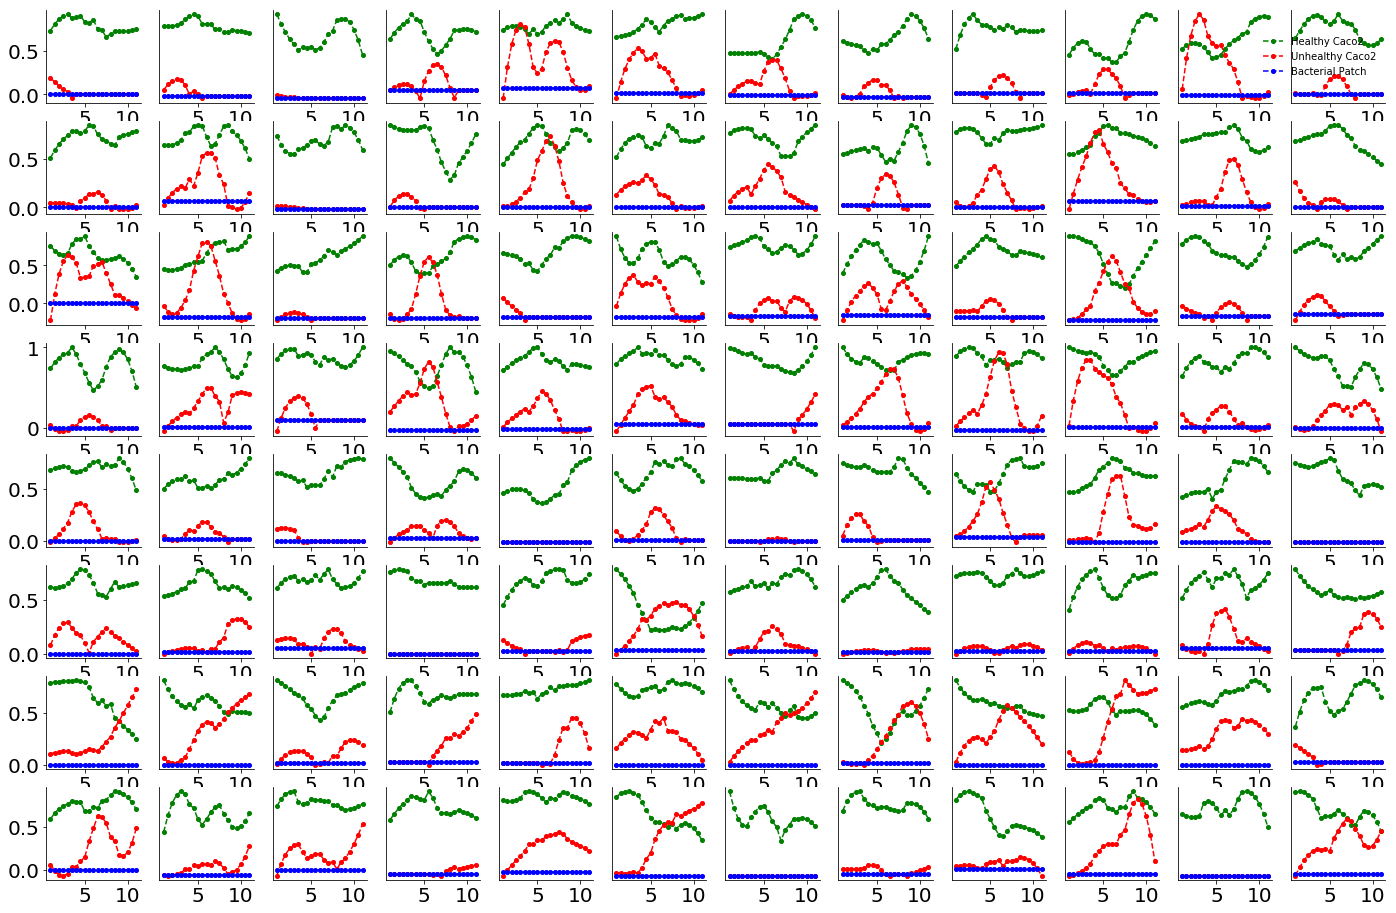

In [7]:

#time_keys = ['02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19'];
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
from scipy.signal import savgol_filter

#all_row_ind = ['G','H']
all_row_ind = ['A','B','C','D','E','F','G','H']
#all_row_ind = all_row_ind.reverse()
all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12']
#all_col_ind = ['9','10','11','12']
plt.figure(figsize=(24,16))
for row_ind in range(0,len(all_row_ind)):
    for col_ind in range(0,len(all_col_ind)):
        this_well = all_row_ind[row_ind] + all_col_ind[col_ind];
        #this_well = 'A12'
        #time_keys = [ repr(elem) for elem in range(71,80)]
        time_keys = list(feature_dict[this_well].keys());
        time_keys.sort()
        time_keys = time_keys[0:-2]
        for kernel_ind in [0,1,2]:
            kernel =  kernel_names[kernel_ind];
            if kernel_ind==2:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                ys = [np.max([elem-ys[0],0]) for elem in ys]
            if kernel_ind==0:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                ys = ys/np.max(ys);
            if kernel_ind ==1:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                ys = ys/np.max(ys);
                ys = [np.max([elem-ys[0],0]) for elem in ys]
            times = [np.float(np.int(elem)*30.0/60.0) for elem in time_keys]
            subax = plt.subplot(len(all_row_ind),len(all_col_ind),len(all_col_ind)*(row_ind)+(col_ind+1),frameon=True,fc='white',)
            ys = savgol_filter(ys, 9, 2) # window size 51, polynomial order 3
            subax.plot(times,ys,'.--',ms=8,color=list_of_colors[kernel_ind])
            #subax.xlabel('Time (Hrs)',size=20)
            #subax.ylabel('# of Clusters Estim.',size=20)
            #ax = plt.gca()
            #plt.ylim([0,1.0])
            #subax.set_yscale('log')
        subax.spines['right'].set_visible(False)
        subax.spines['top'].set_visible(False)   
        #if not (row_ind ==7):
        #subax.get_xaxis().set_ticks([repr(np.int(elem)*30.0/60.0) for elem in time_keys])
        if not (col_ind ==0):
            subax.get_yaxis().set_ticks([])
        if row_ind==0 and col_ind==11:
            plt.legend(['Healthy Caco2','Unhealthy Caco2','Bacterial Patch'],fontsize=10,frameon=False)
#        subax.set_facecolor('gray')



## L. monocytogenes



In [8]:
feature_dict

{'A1': {'15': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '03': {'hA549': 5, 'uha549': 2, 'bp': 0},
  '20': {'hA549': 5, 'uha549': 0, 'bp': 0},
  '19': {'hA549': 6, 'uha549': 0, 'bp': 0},
  '22': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '17': {'hA549': 6, 'uha549': 0, 'bp': 0},
  '07': {'hA549': 6, 'uha549': 0, 'bp': 0},
  '23': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '04': {'hA549': 6, 'uha549': 1, 'bp': 0},
  '13': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '21': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '02': {'hA549': 4, 'uha549': 1, 'bp': 0},
  '16': {'hA549': 2, 'uha549': 0, 'bp': 0},
  '10': {'hA549': 5, 'uha549': 0, 'bp': 0},
  '18': {'hA549': 3, 'uha549': 0, 'bp': 0},
  '09': {'hA549': 5, 'uha549': 0, 'bp': 0},
  '05': {'hA549': 5, 'uha549': 1, 'bp': 0},
  '24': {'hA549': 4, 'uha549': 0, 'bp': 0},
  '06': {'hA549': 5, 'uha549': 0, 'bp': 0},
  '11': {'hA549': 6, 'uha549': 1, 'bp': 0},
  '14': {'hA549': 6, 'uha549': 1, 'bp': 0},
  '08': {'hA549': 5, 'uha549': 1, 'bp': 0},
  '12': {'hA549': 4, 'uha5

In [9]:
import itertools
all_row_ind = ['A','B']
half_col_ind = ['1','2','3','4','5','6'];
all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];

all_indices = [];
for full_index in ['A','B']:
    for col_id in half_col_ind:
        all_indices.append(full_index+col_id);
for full_index in ['C']:
    for col_id in half_col_ind:
        all_indices.append(full_index+col_id);
all_traces = dict(); 
        
for kernel_ind in [0,1,2]:
    all_traces[kernel_ind] = np.zeros( (len(all_indices),len(feature_dict['A1'].keys()) ))
    for well_id_index in range(0,len(all_indices)):
        this_well = all_indices[well_id_index];
        time_keys = list(feature_dict[this_well].keys());
        time_keys.sort()
        #print(time_keys)
        kernel =  kernel_names[kernel_ind];
        if kernel_ind==2:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = [np.max([elem-ys[0],0]) for elem in ys]
        if kernel_ind==0:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = ys/np.max(ys[0:-2]);
        if kernel_ind ==1:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            if np.max(ys)>0.0:
                ys = ys/np.max(ys[0:])
            
            ys = [np.max([elem-ys[0],0]) for elem in ys]
            
        try:
            all_traces[kernel_ind][well_id_index,:] = np.asarray(savgol_filter(ys,7,3),dtype=np.float);
        except:
            print(well_id_index)

In [10]:
all_traces[0].shape

(18, 23)

/Users/eyeung/Library/Python/3.7/lib/python/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


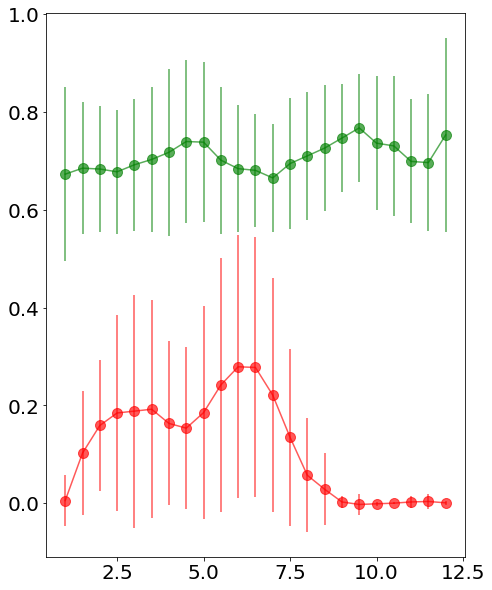

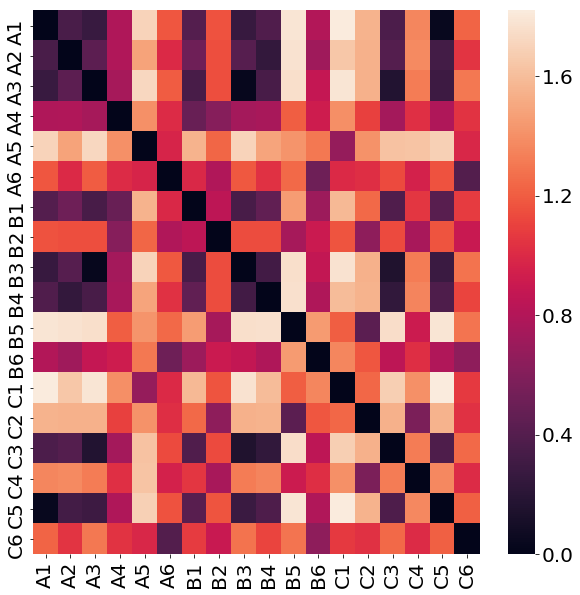

<Figure size 360x360 with 0 Axes>

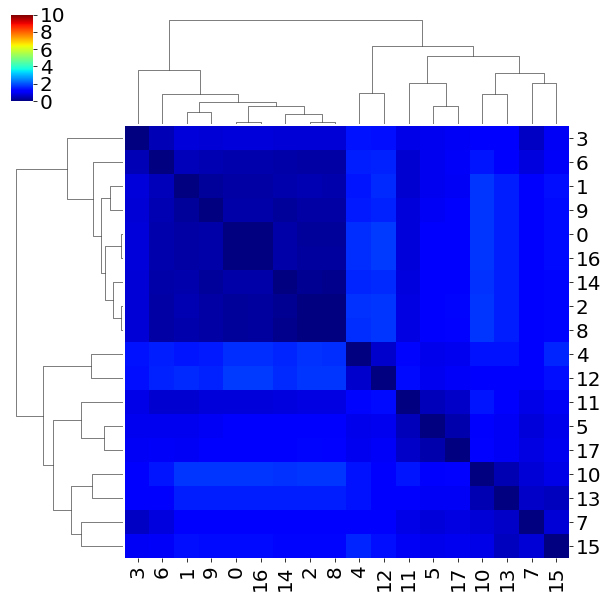

In [11]:
times = [np.float(elem)*.5 for elem in time_keys]
Error_Matrix = np.zeros((len(all_indices),len(all_indices)));
plt.figure(figsize=(7.5,10))

for kernel_ind in [0,1]:
    ax = plt.errorbar(np.array(times[0:]),np.mean(all_traces[kernel_ind],axis=0)[0:],np.std(all_traces[kernel_ind],axis=0)[0:],marker='.',markersize=20,color=list_of_colors[kernel_ind],alpha=.65)

for kernel_ind in [1]:
    for row_ind in range(0,len(all_indices)):
        for col_ind in range(0,len(all_indices)):
                Error_Matrix[row_ind,col_ind] = np.linalg.norm(all_traces[kernel_ind][row_ind,:]-all_traces[kernel_ind][col_ind,:],ord=2);
            
#plt.plot(times[0:24],np.mean(all_traces[1],axis=0)[0:24],,markersize=20)
#plt.plot(times[0:24],np.mean(all_traces[2],axis=0)[0:24],'b.',markersize=20)
import seaborn as sns;
plt.figure(figsize=(10,10))
sns.heatmap(Error_Matrix,xticklabels=all_indices,yticklabels=all_indices)
plt.figure(figsize=(5,5))

sns.clustermap(Error_Matrix,cmap='jet',vmin=0.0,vmax=10.0)



In [12]:
# Save Traces
Num_to_Curve_Dict[21] = dict();
for kernel_ind in [0,1]:
    Num_to_Curve_Dict[21][kernel_ind] = np.mean(all_traces[kernel_ind],axis=0); 
Num_to_Name_Dict[21]='L. monocytogenes';
  

## L. innocua

In [13]:
(all_traces[1])

array([[ 9.52380952e-02,  2.26190476e-01,  1.90476190e-01,
         7.14285714e-02, -4.76190476e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-3.17460317e-02,  1.98412698e-01,  2.69841270e-01,
         2.38095238e-01,  1.90476190e-01,  4.76190476e-02,
         9.52380952e-02,  4.76190476e-02, -3.17460317e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.46520147e-02,  3.47985348e-02,  2.93040293e-02,
         1.09890110e-02, -7.3

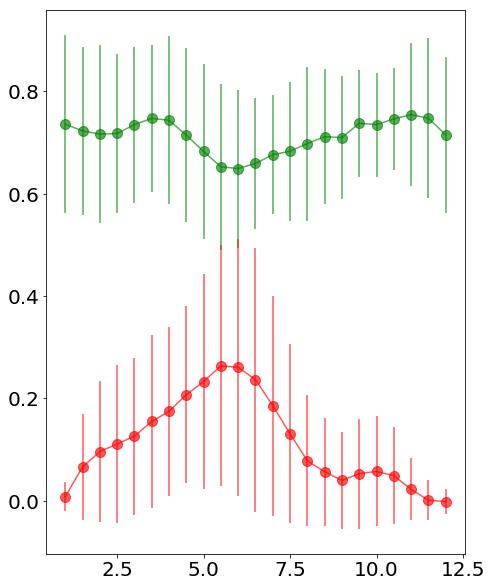

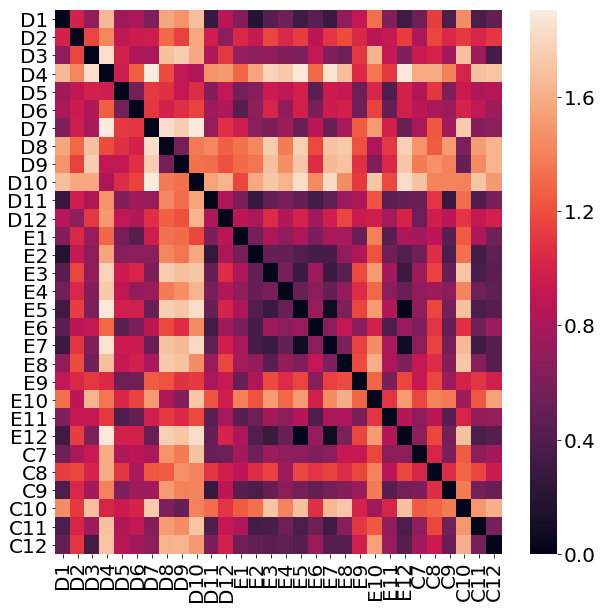

<Figure size 360x360 with 0 Axes>

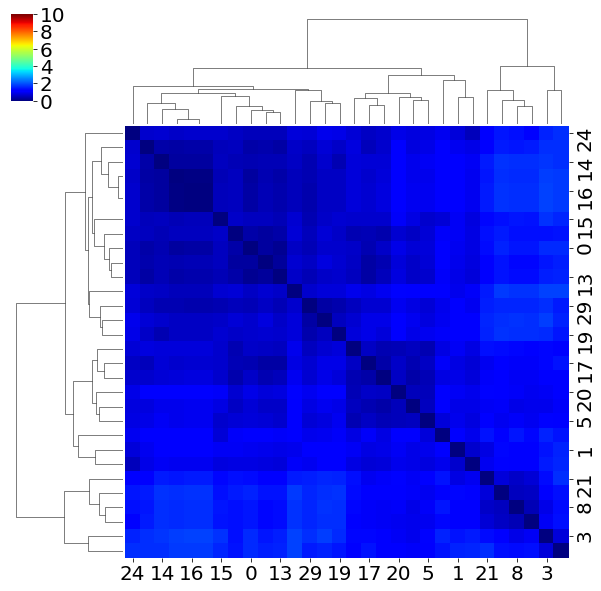

In [14]:
import itertools
all_row_ind = ['C','D','E']
half_col_ind = ['7','8','9','10','11','12'];
all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];

all_indices = [];
for full_index in ['D','E']:
    for col_id in all_col_ind:
        all_indices.append(full_index+col_id);
for full_index in ['C']:
    for col_id in half_col_ind:
        all_indices.append(full_index+col_id);

        
all_traces = dict(); 
for kernel_ind in [0,1,2]:
    all_traces[kernel_ind] = np.zeros( (len(all_indices),len(feature_dict['A1'].keys()) ))
    for well_id_index in range(0,len(all_indices)):
        this_well = all_indices[well_id_index];
        time_keys = list(feature_dict[this_well].keys());
        time_keys.sort()
        #print(time_keys)
        kernel =  kernel_names[kernel_ind];
        if kernel_ind==2:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = [np.max([elem-ys[0],0]) for elem in ys]
        if kernel_ind==0:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = ys/np.max(ys[0:-2]);
        if kernel_ind ==1:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            if np.max(ys)>0.0:
                ys = ys/np.max(ys)
            
            ys = [np.max([elem-ys[0],0]) for elem in ys]
            
        try:
            all_traces[kernel_ind][well_id_index,:] = np.asarray(savgol_filter(ys,7,3),dtype=np.float);
        except:
            print(well_id_index)

Error_Matrix = np.zeros((len(all_indices),len(all_indices)));
times = [np.float(elem)*.5 for elem in time_keys]
plt.figure(figsize=(7.5,10))
for kernel_ind in [0,1]:
    ax = plt.errorbar(np.array(times[0:25]),np.mean(all_traces[kernel_ind],axis=0)[0:25],np.std(all_traces[kernel_ind],axis=0)[0:25],marker='.',markersize=20,color=list_of_colors[kernel_ind],alpha=.65)
    for row_ind in range(0,len(all_indices)):
        for col_ind in range(0,len(all_indices)):
            Error_Matrix[row_ind,col_ind] = np.linalg.norm(all_traces[kernel_ind][row_ind,:]-all_traces[kernel_ind][col_ind,:],ord=2);
            
#plt.plot(times[0:24],np.mean(all_traces[1],axis=0)[0:24],,markersize=20)
#plt.plot(times[0:24],np.mean(all_traces[2],axis=0)[0:24],'b.',markersize=20)
import seaborn as sns;
plt.figure(figsize=(10,10))
sns.heatmap(Error_Matrix,xticklabels=all_indices,yticklabels=all_indices)
plt.figure(figsize=(5,5))

sns.clustermap(Error_Matrix,cmap='jet',vmin=0.0,vmax=10.0) 

In [15]:
# Save Traces
Num_to_Curve_Dict[22] = dict();
for kernel_ind in [0,1]:
    Num_to_Curve_Dict[22][kernel_ind] = np.mean(all_traces[kernel_ind],axis=0); 
Num_to_Name_Dict[22]='L. innocua';
  

## P. putida

In [16]:
feature_dict['H5']

{'12': {'hA549': 5, 'uha549': 10, 'bp': 0},
 '19': {'hA549': 6, 'uha549': 7, 'bp': 0},
 '02': {'hA549': 5, 'uha549': 5, 'bp': 0},
 '07': {'hA549': 5, 'uha549': 13, 'bp': 0},
 '03': {'hA549': 5, 'uha549': 6, 'bp': 0},
 '16': {'hA549': 6, 'uha549': 11, 'bp': 0},
 '04': {'hA549': 5, 'uha549': 5, 'bp': 0},
 '17': {'hA549': 4, 'uha549': 14, 'bp': 0},
 '14': {'hA549': 5, 'uha549': 10, 'bp': 0},
 '10': {'hA549': 6, 'uha549': 10, 'bp': 0},
 '05': {'hA549': 5, 'uha549': 5, 'bp': 0},
 '11': {'hA549': 4, 'uha549': 11, 'bp': 0},
 '08': {'hA549': 6, 'uha549': 10, 'bp': 0},
 '09': {'hA549': 6, 'uha549': 8, 'bp': 0},
 '06': {'hA549': 5, 'uha549': 6, 'bp': 0},
 '13': {'hA549': 5, 'uha549': 15, 'bp': 0},
 '15': {'hA549': 6, 'uha549': 10, 'bp': 0},
 '21': {'hA549': 5, 'uha549': 7, 'bp': 0},
 '18': {'hA549': 6, 'uha549': 11, 'bp': 0},
 '20': {'hA549': 4, 'uha549': 9, 'bp': 0},
 '22': {'hA549': 5, 'uha549': 11, 'bp': 0},
 '23': {'hA549': 6, 'uha549': 11, 'bp': 0},
 '24': {'hA549': 5, 'uha549': 9, 'bp': 0}

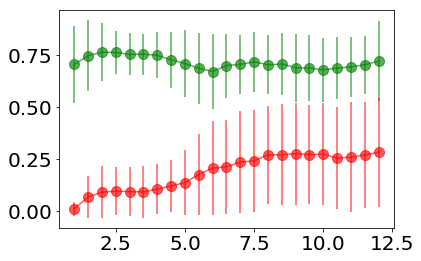

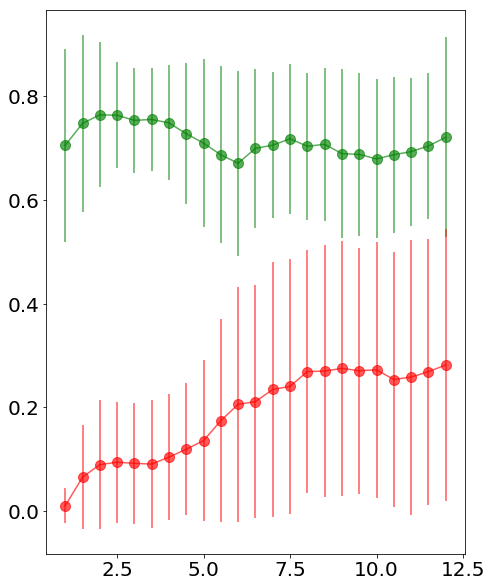

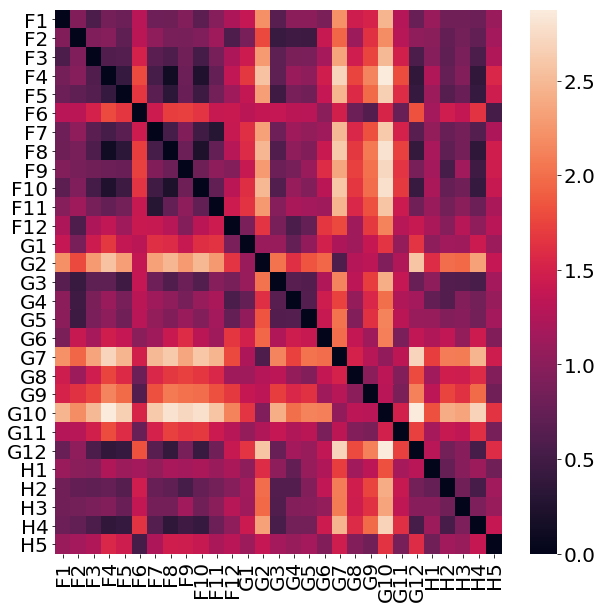

<Figure size 720x720 with 0 Axes>

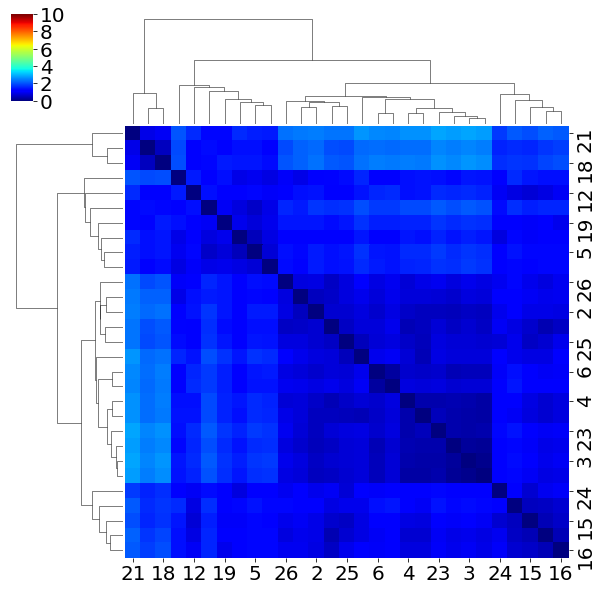

In [17]:
import itertools
all_row_ind = ['F','G','H']
half_col_ind = ['1','2','3','4','5',];
all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];

all_indices = [];
for full_index in ['F','G']:
    for col_id in all_col_ind:
        all_indices.append(full_index+col_id);
for full_index in ['H']:
    for col_id in half_col_ind:
        all_indices.append(full_index+col_id);

        
all_traces = dict(); 
for kernel_ind in [0,1,2]:
    all_traces[kernel_ind] = np.zeros( (len(all_indices),len(feature_dict['A1'].keys()) ))
    for well_id_index in range(0,len(all_indices)):
        this_well = all_indices[well_id_index];
        time_keys = list(feature_dict[this_well].keys());
        time_keys.sort()
        #print(time_keys)
        kernel =  kernel_names[kernel_ind];
        if kernel_ind==2:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = [np.max([elem-ys[0],0]) for elem in ys]
        if kernel_ind==0:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = ys/np.max(ys[0:-2]);
        if kernel_ind ==1:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            if np.max(ys)>0.0:
                ys = ys/np.max(ys)
            
            ys = [np.max([elem-ys[0],0]) for elem in ys]
            
        try:
            all_traces[kernel_ind][well_id_index,:] = np.asarray(savgol_filter(ys,7,3),dtype=np.float);
        except:
            print(well_id_index)
        
for kernel_ind in [0,1]:
    ax = plt.errorbar(np.array(times[0:24]),np.mean(all_traces[kernel_ind],axis=0)[0:24],np.std(all_traces[kernel_ind],axis=0)[0:24],marker='.',markersize=20,color=list_of_colors[kernel_ind],alpha=.65)
    
Error_Matrix = np.zeros((len(all_indices),len(all_indices)));
times = [np.float(elem)*.5 for elem in time_keys]
plt.figure(figsize=(7.5,10))

for kernel_ind in [0,1]:
    ax = plt.errorbar(np.array(times[0:24]),np.mean(all_traces[kernel_ind],axis=0)[0:24],np.std(all_traces[kernel_ind],axis=0)[0:24],marker='.',markersize=20,color=list_of_colors[kernel_ind],alpha=.65)
    for row_ind in range(0,len(all_indices)):
        for col_ind in range(0,len(all_indices)):
            Error_Matrix[row_ind,col_ind] = np.linalg.norm(all_traces[kernel_ind][row_ind,:]-all_traces[kernel_ind][col_ind,:],ord=2);
            
#plt.plot(times[0:24],np.mean(all_traces[1],axis=0)[0:24],,markersize=20)
#plt.plot(times[0:24],np.mean(all_traces[2],axis=0)[0:24],'b.',markersize=20)
import seaborn as sns;
plt.figure(figsize=(10,10))
sns.heatmap(Error_Matrix,xticklabels=all_indices,yticklabels=all_indices)
plt.figure(figsize=(10,10))

sns.clustermap(Error_Matrix,cmap='jet',vmin=0.0,vmax=10.0)    
    

In [18]:
# Save Traces
Num_to_Curve_Dict[23] = dict();
for kernel_ind in [0,1]:
    Num_to_Curve_Dict[23][kernel_ind] = np.mean(all_traces[kernel_ind],axis=0); 
Num_to_Name_Dict[23]='P. putida';


StandardCurve_File = open('/Users/eyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves.pickle','wb');
All_Dicts = [Num_to_Curve_Dict,Num_to_Name_Dict]; 
pickle.dump(All_Dicts,StandardCurve_File);
StandardCurve_File.close();